In [1]:
################################################################################################
# OBJECTIVE:  # First individual-based model of a pen of fattening pigs - no nutritional consideration
# AUTHOR: Florence Garcia-Launay (florence.garcia-launay@inrae.fr) #
# LICENCE: CC0 1.0 Universal (CC0 1.0), Public Domain Dedication #
# LAST UPDATE: 2024-07-05 #
# VERSIONS : Python 3.11
################################################################################################

In [186]:
# to be executed if Classes_Step0 is modified
import sys
del sys.modules['Classes_Step0']

In [193]:
# to import the modules necessary
from Classes_Step0 import *
from csv import *
import plotly.express as px

In [194]:
# initializing the objects
param_nbpigs = 400 # work with a batch of 400 pigs 

My_Batch = Batch(nb_pigs = param_nbpigs, ID='B0')


In [195]:
# Preparing output files

f_perf = open("Performances %s .txt" % ('_Step0'), "w")
print(
    "Pig" + ' ' + "delivery"  + ' ' + "AgeInit_d" + ' ' + "SlaughterAge_d" + ' ' + "BWInit_kg" + ' ' + "SlaughterBW_kg" + ' ' + "ADG_kg_d", file=f_perf)
f_perf.flush()

f_daily = open("Daily_output %s.txt" % ('Step_0'), "w")
print(
    "Pig" + ' ' + "Age_d" + ' ' + "BW_kg" + ' ' + "Daily_Gain_kg" , file=f_daily)
f_daily.flush()



In [196]:
# Simulation
param_duration = 120 # maximum fattening duration is 120 days

AGENDA = {(param_duration): ['My_Batch.delivery(param_duration, f_perf, i)'], 
          (param_duration-7): ['My_Batch.delivery(param_duration, f_perf, i)'],
          (param_duration-14): ['My_Batch.delivery(param_duration, f_perf, i)'], 
          (param_duration-21): ['My_Batch.delivery(param_duration, f_perf, i)'],
          (param_duration-28): ['My_Batch.delivery(param_duration, f_perf, i)']}

for i in range(param_duration + 1):
    My_Batch.batch_growth(param_duration, f_daily, i)
    if i in AGENDA.keys():
        for evs in AGENDA[i]:
            exec(evs)

f_perf.close()
f_daily.close()
    

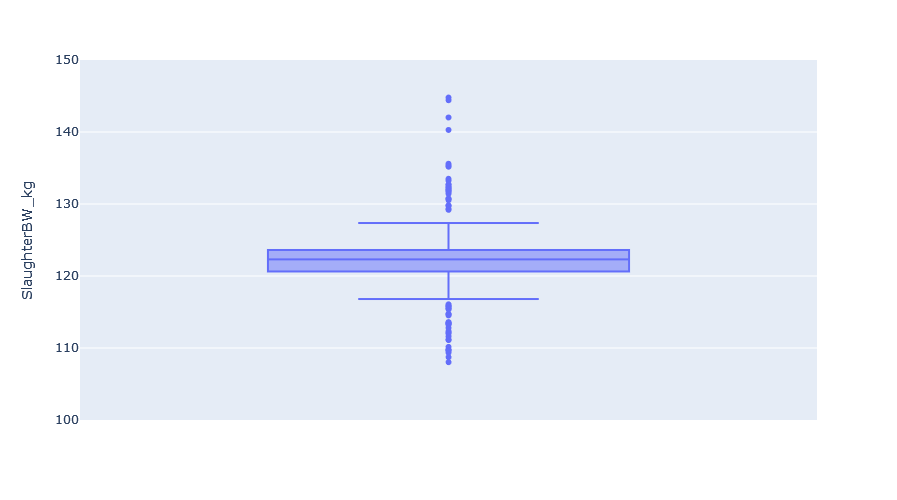

In [197]:
# providing a simple graph with output file
performances = pd.read_csv("Performances %s .txt" % ('_Step0'), sep=' ', header =0)
BW = px.box(performances,y='SlaughterBW_kg', height = 500, range_y = [100, 150])
BW.show()


In [198]:
daily_perf = pd.read_csv("Daily_output Step_0.txt", sep=' ', header =0)
import seaborn as sns
sns.catplot(data=daily_perf, x="Age_d", y="BW_kg", hue="Pig", kind="strip", legend=False)

,Pig,delivery,AgeInit_d,SlaughterAge_d,BWInit_kg,SlaughterBW_kg,ADG_kg_d
0,B0P100,slaughterhouse,71,164,28.634,124.889,1.035
1,B0P109,slaughterhouse,67,160,29.124,129.353,1.078
2,B0P110,slaughterhouse,72,165,34.371,123.828,0.962
3,B0P112,slaughterhouse,71,164,35.759,124.904,0.959
4,B0P115,slaughterhouse,69,162,32.446,133.252,1.084
...,...,...,...,...,...,...,...
344,B0P78,Room_emptying,73,194,29.842,112.158,0.680
345,B0P82,Room_emptying,69,190,25.380,116.066,0.749
346,B0P88,slaughterhouse,73,194,30.693,123.101,0.764
347,B0P94,Room_emptying,74,195,27.602,112.787,0.704
